In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

LOADS

In [2]:
# %load visualize_hierarchical_clusters.py
# Omid55
def visualize_hierarchical_clusters(data, NUMBER_OF_CLUSTERS, metric='cosine'):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn import manifold
    from time import time


    X = np.asmatrix(data.ix[:,:-1])
    y = np.asanyarray(data['label'])
    
    #----------------------------------------------------------------------
    # Visualize the clustering
    def plot_clustering(X_red, X, labels, title=None):
        x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
        X_red = (X_red - x_min) / (x_max - x_min)

        plt.figure(figsize=(6, 4))
        for i in range(X_red.shape[0]):
            plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                     color=plt.cm.spectral(labels[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})

        plt.xticks([])
        plt.yticks([])
        if title is not None:
            plt.title(title, size=17)
        plt.axis('off')
        plt.tight_layout()

    #----------------------------------------------------------------------
    # 2D embedding of the digits dataset
    print("Computing embedding")
    X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
    print("Done.")

    if metric == 'euclidean':
        linkages = ['ward', 'average', 'complete']
    else:
        linkages = ['average', 'complete']

    for linkage in linkages:
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=NUMBER_OF_CLUSTERS)
        t0 = time()
        clustering.fit(X_red)
        print("%s : %.2fs" % (linkage, time() - t0))
        plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)

    plt.show()

In [3]:
# %load normalize_the_dataset.py
# Omid55
def normalize_the_dataset(dataset):
	from sklearn.preprocessing import StandardScaler

	# MIN MAX Normalization
	#x = dataset.values #returns a numpy array
	#min_max_scaler = preprocessing.MinMaxScaler()
	#x_scaled = min_max_scaler.fit_transform(x)
	#dataset = pd.DataFrame(x_scaled)

	# Standard Normalization (x-mean(x) / std(x))
	x = dataset.values[:,:-1] #returns a numpy array
	min_max_scaler = StandardScaler()
	x_scaled = min_max_scaler.fit_transform(x)
	dataset = pd.DataFrame(np.column_stack((x_scaled,dataset.values[:,-1])), columns=dataset.columns)

	return dataset

In [4]:
# %load plot_data.py
# Omid55
def plot_data(data, has_label=True):
	import numpy as np
	from sklearn.manifold import TSNE
	from sklearn.decomposition import PCA

	if not has_label:
		data = data.copy()
		data['label'] = np.zeros([len(data),1])

	LIMIT = 4000
	if data.shape[0] > LIMIT:
		dt = data.sample(n=LIMIT, replace=False)
		X = dt.ix[:,:-1]
		labels = dt.ix[:,-1]
	else:
		X = data.ix[:,:-1]
		labels = data.ix[:,-1]

	tsne_model = TSNE(n_components=2, random_state=0)
	np.set_printoptions(suppress=True)
	points1 = tsne_model.fit_transform(X)
	df1 = pd.DataFrame(data=np.column_stack([points1,labels]), columns=["x","y","class"])
	sns.lmplot("x", "y", data=df1, hue='class', fit_reg=False, palette=sns.color_palette('colorblind'))
	sns.plt.title('TNSE')

	pca = PCA(n_components=2)
	pca.fit(X)
	points2 = pca.transform(X)
	df2 = pd.DataFrame(data=np.column_stack([points2,labels]), columns=["x","y","class"])
	sns.lmplot("x", "y", data=df2, hue='class', fit_reg=False, palette=sns.color_palette('colorblind'))
	sns.plt.title('PCA')


In [5]:
# %load dropnans_from_dataset.py
# Omid55
def dropnans_from_dataset(dataset):
	to_be_deleted = []
	for idx,item in enumerate(dataset.as_matrix()):
	    if np.isnan(item).any():
	        to_be_deleted.append(idx)
	dataset = dataset.drop(to_be_deleted)
	return dataset

In [6]:
# %load do_classification.py
#Omid55
def do_classification(dataset):
    
    # import print_class_ratio.py
    import sklearn as sk
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import cross_validation
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn import svm
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.linear_model import SGDClassifier
    from sklearn.dummy import DummyClassifier

    if type(dataset) is pd.core.frame.DataFrame:
        dataset = dataset.as_matrix()

    #clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    models = [#(DummyClassifier(strategy='stratified'), 'Dummy (Stratified)'),
        (DummyClassifier(strategy='uniform'), 'Dummy (Uniform)'),
        (SGDClassifier(), 'Stochastic Gradient Descent Classifier'),
        (LogisticRegression(), 'Logistic Regression'),
        (GaussianNB(), 'Naive Bayes'),
        (svm.LinearSVC(C=1.0, verbose=False), 'Linear SVM'),
        (svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False), 'SVM with RBF kernel'),
        (RandomForestClassifier(n_estimators=100), 'Random Forest'),
        (KNeighborsClassifier(n_neighbors=8), 'KNN'),
        (DecisionTreeClassifier(max_depth=5), 'Decision Tree'),
        (AdaBoostClassifier(), 'AdaBoost'),
        (LinearDiscriminantAnalysis(), 'Linear Discriminant Analysis'),
        (QuadraticDiscriminantAnalysis(), 'Quadratic Discriminant Analysis')]
    
    #print(print_class_ratio(dataset))
    #print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    # applying the models
    n_folds = 10
    k_fold = cross_validation.KFold(n=len(dataset), n_folds=n_folds, shuffle=False, random_state=None)
    accuracy = {}
    train_accuracy = {}
    for train_index, test_index in k_fold:
        X_train = dataset[train_index,:-1]
        y_train = dataset[train_index,-1]
        X_test = dataset[test_index,:-1]
        y_test = dataset[test_index,-1]

        for clf, name in models:
            clf.fit(X_train, y_train)

            # test data accuracy
            y_pred = clf.predict(X_test)
            accuracy_percent = 100 * sk.metrics.accuracy_score(y_test, y_pred) / n_folds
            if name not in accuracy:
                accuracy[name] = accuracy_percent
            else:
                accuracy[name] += accuracy_percent

            # train data accuracy
            y_train_pred = clf.predict(X_train)
            train_accuracy_percent = 100 * sk.metrics.accuracy_score(y_train, y_train_pred) / n_folds
            if name not in train_accuracy:
                train_accuracy[name] = train_accuracy_percent
            else:
                train_accuracy[name] += train_accuracy_percent
        result = []
        for key in accuracy.keys():
            result.append([key, round(accuracy[key],2), round(train_accuracy[key],2)])
        result_accuracy_df = pd.DataFrame(data=result, columns=['classifier', 'test acc', 'train acc'])
    return result_accuracy_df


# Run

In [22]:
# original_data = pd.read_csv('StatDataset.csv')
# original_data = original_data.drop(original_data.columns[0], 1)
# original_data = dropnans_from_dataset(original_data)
# sampled_data = original_data.sample(n=1000)

original_data = pd.read_csv('ReallyGoodStat2015_for_Classification2016_Dataset.csv')
print(original_data.shape)
original_data = original_data.drop(original_data.columns[0], 1)
#sampled_data = dropnans_from_dataset(original_data)
original_data = dropnans_from_dataset(original_data)
sampled_data = original_data.sample(n=950)


(998, 17)


In [23]:
sampled_data.head()

,winner_avg_game_count,winner_std_game_count,winner_avg_win_ratio,winner_std_win_ratio,winner_avg_same_champion_game_count,winner_std_same_champion_game_count,winner_avg_same_champion_win_ratio,winner_std_same_champion_win_ratio,loser_avg_game_count,loser_std_game_count,loser_avg_win_ratio,loser_std_win_ratio,loser_avg_same_champion_game_count,loser_std_same_champion_game_count,loser_avg_same_champion_win_ratio,loser_std_same_champion_win_ratio
696,994.6,548.639991,0.495764,0.018326,89.000000,128.548823,0.458785,0.110532,716.60,529.223809,0.490126,0.012066,15.000000,14.514361,0.744974,0.222831
588,937.2,694.776626,0.508042,0.011558,43.000000,43.058100,0.515859,0.108270,345.20,251.941581,0.459633,0.049784,8.333333,9.672412,0.515152,0.408810
349,463.0,319.537165,0.456187,0.059444,20.000000,23.338095,0.481656,0.173272,903.25,746.322777,0.491877,0.012919,21.500000,23.286262,0.350585,0.212865
372,672.0,361.422883,0.491556,0.020232,46.000000,48.914892,0.665523,0.252126,1328.20,634.758033,0.507448,0.003613,46.250000,53.592793,0.480441,0.063799
950,535.2,382.604443,0.532199,0.030147,38.666667,39.194671,0.399898,0.283205,662.00,563.108160,0.482609,0.030078,51.800000,77.051671,0.513580,0.103858


Analysis of importance for each feature

(array([   1.,   20.,   48.,  128.,  206.,  240.,  168.,   89.,   36.,   14.]),
 array([-1207.6 ,  -979.75,  -751.9 ,  -524.05,  -296.2 ,   -68.35,
          159.5 ,   387.35,   615.2 ,   843.05,  1070.9 ]),
 <a list of 10 Patch objects>)

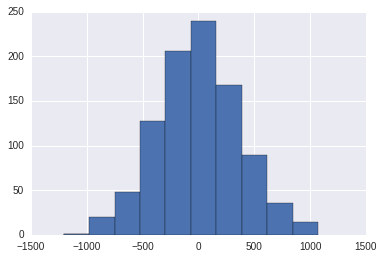

In [26]:
plt.hist(sampled_data['winner_avg_game_count'] - sampled_data['loser_avg_game_count'] )

(array([   9.,   25.,   53.,  172.,  387.,  188.,   74.,   29.,   11.,    2.]),
 array([-0.19980364, -0.15629281, -0.11278198, -0.06927114, -0.02576031,
         0.01775052,  0.06126136,  0.10477219,  0.14828302,  0.19179386,
         0.23530469]),
 <a list of 10 Patch objects>)

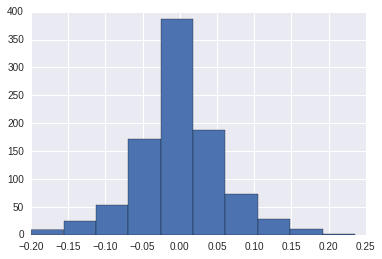

In [27]:
plt.hist(sampled_data['winner_avg_win_ratio'] - sampled_data['loser_avg_win_ratio'] )

(array([   1.,    2.,    1.,    4.,    4.,   69.,  655.,  182.,   25.,    7.]),
 array([-644.5       , -548.26666667, -452.03333333, -355.8       ,
        -259.56666667, -163.33333333,  -67.1       ,   29.13333333,
         125.36666667,  221.6       ,  317.83333333]),
 <a list of 10 Patch objects>)

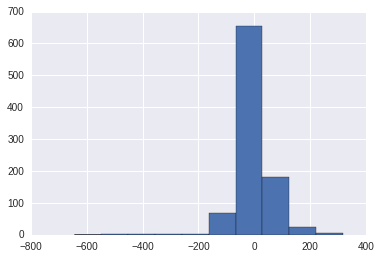

In [28]:
plt.hist(sampled_data['winner_avg_same_champion_game_count'] - sampled_data['loser_avg_same_champion_game_count'] )

(array([   4.,   11.,   60.,  166.,  297.,  246.,  123.,   31.,   10.,    2.]),
 array([-0.73333333, -0.58      , -0.42666667, -0.27333333, -0.12      ,
         0.03333333,  0.18666667,  0.34      ,  0.49333333,  0.64666667,
         0.8       ]),
 <a list of 10 Patch objects>)

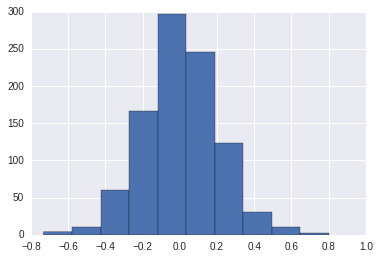

In [29]:
plt.hist(sampled_data['winner_avg_same_champion_win_ratio'] - sampled_data['loser_avg_same_champion_win_ratio'] )

Adding label and swapping 50% of winners and losers ;Thus:
    
label 0 == winner + loser

label 1 == loser + winner

In [30]:
dataset = sampled_data.copy()
dataset['label'] = np.zeros([len(dataset),1])
dt = dataset.as_matrix()
idx = np.random.choice(len(dt), int(len(dt)/2), replace=False)
tf = math.floor(dt.shape[1]/2)
tmp = dt[idx,tf:2*tf]
dt[idx,tf:2*tf] = dt[idx,:tf]
dt[idx,:tf] = tmp
dt[idx,-1] = 1
dataset = pd.DataFrame(data=dt, columns=dataset.columns)

dataset = normalize_the_dataset(dataset)

In [31]:
dataset.head()

,winner_avg_game_count,winner_std_game_count,winner_avg_win_ratio,winner_std_win_ratio,winner_avg_same_champion_game_count,winner_std_same_champion_game_count,winner_avg_same_champion_win_ratio,winner_std_same_champion_win_ratio,loser_avg_game_count,loser_std_game_count,loser_avg_win_ratio,loser_std_win_ratio,loser_avg_same_champion_game_count,loser_std_same_champion_game_count,loser_avg_same_champion_win_ratio,loser_std_same_champion_win_ratio,label
0,0.706047,0.492739,0.487315,-0.899560,-0.453386,-0.359805,2.177208,0.511776,1.711883,0.637804,0.586548,-0.790714,0.976260,1.492876,0.005746,-0.511454,1.0
1,1.496544,1.148148,0.817320,-0.909625,0.109192,0.111497,0.493867,-0.569571,-0.606416,-0.592623,-0.074110,-0.177329,-0.617171,-0.453755,0.389692,2.318676,0.0
2,-0.202702,-0.337391,-0.137844,0.039087,-0.352926,-0.214111,0.242576,0.043985,1.385771,1.457606,0.515460,-0.896157,-0.357086,-0.230825,-0.731269,0.459499,0.0
3,2.897652,0.910540,0.806385,-1.067044,0.174491,0.285442,0.233645,-0.989325,0.560230,-0.138597,0.509604,-0.753558,0.126869,0.188850,1.413963,0.832017,1.0
4,0.510394,0.626884,0.348843,-0.542718,0.286002,0.672785,0.477125,-0.611207,0.071867,-0.050756,1.252747,-0.560222,-0.017988,0.029679,-0.395374,1.126901,1.0


In [32]:
dataset.shape

(950, 17)

# Plotting

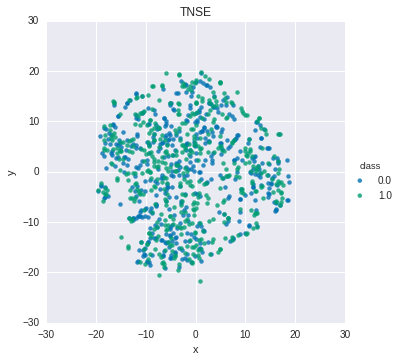

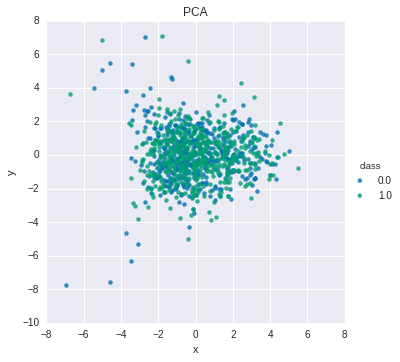

In [33]:
plot_data(dataset)

Computing embedding
Done.
average : 0.22s
complete : 0.22s


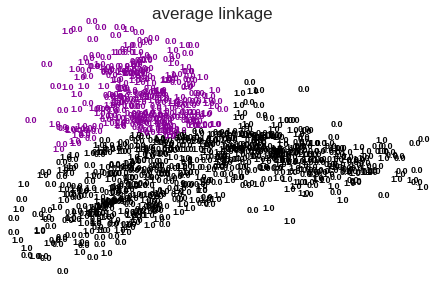

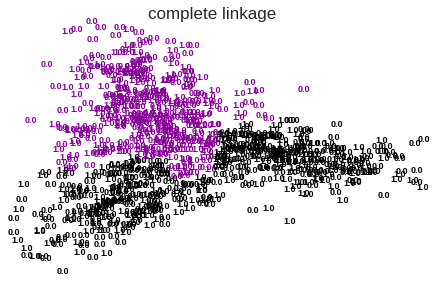

In [34]:
visualize_hierarchical_clusters(dataset, 2)

Computing embedding
Done.
average : 0.28s
complete : 0.28s


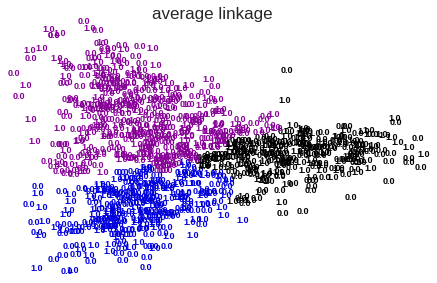

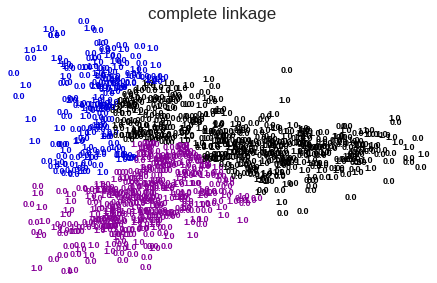

In [18]:
visualize_hierarchical_clusters(dataset, 3)

Computing embedding
Done.
average : 0.28s
complete : 0.29s


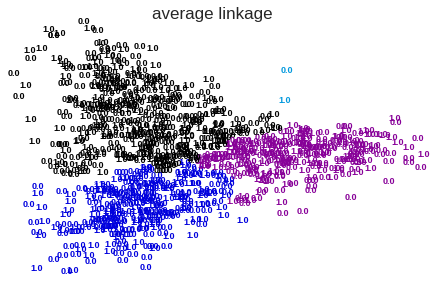

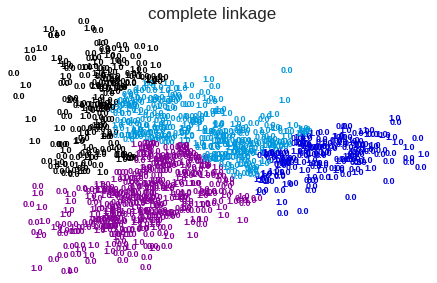

In [19]:
visualize_hierarchical_clusters(dataset, 4)

# Classification

In [35]:
do_classification(dataset)

,classifier,test acc,train acc
0,AdaBoost,54.74,71.86
1,Logistic Regression,47.68,53.70
2,Quadratic Discriminant Analysis,48.11,57.08
3,Linear Discriminant Analysis,47.68,53.54
4,Stochastic Gradient Descent Classifier,51.79,49.94
5,Linear SVM,48.00,53.66
6,SVM with RBF kernel,49.68,71.10
7,Naive Bayes,51.79,53.42
8,Decision Tree,51.37,66.43
9,Random Forest,52.63,100.00
